In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from ipywidgets import FileUpload
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [2]:
base_dir = 'C://Users/Thor/maskdata/maskdata'

training_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir,'test')

In [3]:
print(os.listdir(training_dir))
print(os.listdir(validation_dir))

['without_mask', 'with_mask']
['without_mask', 'with_mask']


In [4]:
train_no_mask_dir = os.path.join(training_dir,'without_mask')
val_no_mask_dir = os.path.join(validation_dir,'without_mask')
train_with_mask_dir = os.path.join(training_dir,'with_mask')
val_with_mask_dir = os.path.join(validation_dir,'with_mask')

In [5]:
print('data training')
print('data train no mask = ',len(os.listdir(train_no_mask_dir)))
print('data train with mask = ',len(os.listdir(train_with_mask_dir)))

data training
data train no mask =  341
data train with mask =  341


In [6]:
print('data validation/testing')
print('data val no mask = ',len(os.listdir(val_no_mask_dir)))
print('data val with mask = ',len(os.listdir(val_with_mask_dir)))

data validation/testing
data val no mask =  66
data val with mask =  66


In [7]:
model = Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [9]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=10,
                                   shear_range=0.2,
                                   fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=10,
                                   shear_range=0.2,
                                   fill_mode='nearest')

In [10]:
train_generator = train_datagen.flow_from_directory(training_dir,
                                                    batch_size=10,
                                                    class_mode='binary',
                                                    target_size=(150,150))
val_generator = val_datagen.flow_from_directory(validation_dir,
                                                batch_size=10,
                                                class_mode='binary',
                                                target_size=(150,150))

Found 682 images belonging to 2 classes.
Found 132 images belonging to 2 classes.


In [11]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.0001),metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=val_generator,
                              verbose=1)

Epoch 1/10
69/69 [==============================] - 34s 497ms/step - loss: 0.4866 - acc: 0.7859 - val_loss: 0.2595 - val_acc: 0.9015
Epoch 2/10
69/69 [==============================] - 31s 449ms/step - loss: 0.1928 - acc: 0.9267 - val_loss: 0.2106 - val_acc: 0.9394
Epoch 3/10
69/69 [==============================] - 32s 463ms/step - loss: 0.1482 - acc: 0.9399 - val_loss: 0.1375 - val_acc: 0.9318
Epoch 4/10
69/69 [==============================] - 32s 460ms/step - loss: 0.1213 - acc: 0.9648 - val_loss: 0.1210 - val_acc: 0.9470
Epoch 5/10
69/69 [==============================] - 32s 461ms/step - loss: 0.0990 - acc: 0.9560 - val_loss: 0.0919 - val_acc: 0.9621
Epoch 6/10
69/69 [==============================] - 32s 461ms/step - loss: 0.0826 - acc: 0.9707 - val_loss: 0.1469 - val_acc: 0.9242
Epoch 7/10
69/69 [==============================] - 32s 461ms/step - loss: 0.0747 - acc: 0.9736 - val_loss: 0.0844 - val_acc: 0.9697
Epoch 8/10
69/69 [==============================] - 32s 459ms/step - 

Text(0.5, 1.0, 'Training and validation loss')

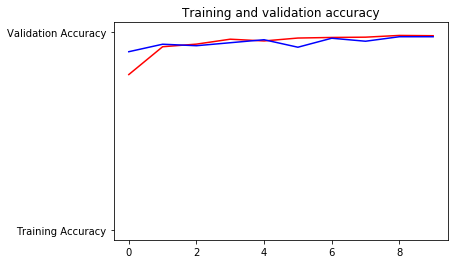

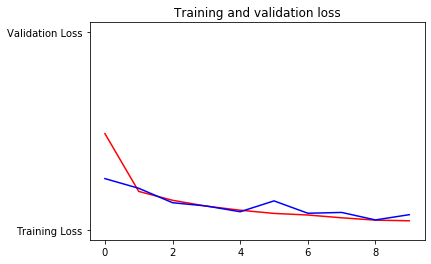

In [13]:

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')

tanpa_masker.jpeg
Tanpa Masker


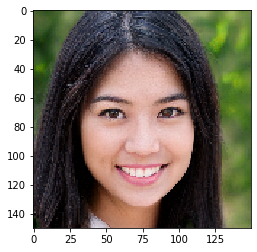

In [17]:
base_img = 'C:/Users/Thor/maskdata/'
image_file = 'tanpa_masker.jpeg'
image_dir = base_img+image_file
img = image.load_img(image_dir, target_size=(150,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img) 
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
  
print(image_file)
if classes==0:
    print('Pakai Masker')
else:
    print('Tanpa Masker')